# 导入相应必须的包

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

# 预先载入warnings，忽略警告
import warnings 
warnings.filterwarnings("ignore")

# Step 0.导入数据

In [2]:
df_train = pd.read_csv('train.csv', index_col =0)
df_test = pd.read_csv('test.csv', index_col =0)

# Step 1. 探索性数据分析

## 1.1 观察源数据

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


81列，包含编号1个（Id），特征标签79个，预测值标签1个（SalePrice）

## 1.2 查看各列的统计值

In [4]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.3 浏览一下字段

In [5]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.4 查看数据的类型

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

共有1460条记录

## 1.5 弄懂各字段的含义
官网有描述，下面列出来中英对照

 SalePrice: 销售价格<br>
 MSSubClass: 建筑类<br>
LotFrontage: 直线距离<br>
LotArea:土地面积（平凡英尺）<br>
Street: 路的类型 <br>
Alley : 胡同类型<br>
LotShape:房产的形状（是否规则）<br>
LandCounter: 房产的平坦度<br>
Utitles: 公共设备 设施<br>
LotConfig: 划分配置<br>
LandSlope:斜坡程度<br>
Neighborhood: 在Ames city范围的物理位置<br>
Condition1:接近各种条件<br>
Condition2: 接近各种条件<br>
BldgType :住宅的类型<br>
HouseStyle :住宅的风格<br>
OverallQual :给房屋整体材料和装修评分<br>
OverallCond: 为房屋的整体状况评分<br>
YearBuilt: 建造日期<br>
YearRemodAdd: 重新改造日期<br>
RoofStyle :屋顶的类型<br>
RoofMatl :屋顶材料<br>
Exterior1st:房屋外部覆盖物<br>
Exterior2nd:房屋外部覆盖物(不止一种)<br>
MasVnrType :砌体单板类型<br>
MasVnrArea ：单位买诺记的砌体木皮面积<br>
ExterQual : 外部材料的质量评价<br>
ExterCond: 评估外部材料的现状<br>
Foundation :基础类型<br>
BsmtQual : 评估地下室的高度<br>
BsmtCond :评估地下室的一般状况<br>
BsmtExposure :出口或花园墙壁曝光程度<br>
BsmtFinType1 :地下室完工面积比<br>
BsmtFinSF1 :类型1完成平方英尺<br>
BsmtFinType2 :地下室完工面积比（如果不止一种）<br>
BsmtFinSF2 :类型2完成平方英尺<br>
BsmtUnfsF :未完成的地下室平方英尺<br>
TotalBsmtSF :地下室总面积<br>
Heating QC: 热暖质量和条件<br>
CentraAir : 是否有中央空调<br>
Electrical :电气系统<br>
1stFlrSF：一楼平方英尺<br>
2ndFlrSF：二楼平方英尺<br>
LowQualFinSF：低质量完成平方英尺（所有地板）<br>
GrLivArea：高于（地面）居住面积的平方英尺<br>
BsmtFullBath：地下室完整的浴室<br>
BsmtHalfBath：地下室半浴室<br>
FullBath：高档浴室<br>
HalfBath：高于等级的半浴室<br>
Bedroom :地上的卧室<br>
Kitchen: 高档厨房<br>
KitchenQual :厨房质量评估<br>
TotRmsAbvGrd :高档卧室（不包括浴室）<br>
Functional :家庭功能<br>
FireplaceQu :壁炉数量<br>
FireplaceQu :壁炉质量<br>
GarageType : 车库位置<br>
GarageYrBlt :车库建成年份<br>
GarageFinish : 车库的内部完成<br>
GarageCars: 车容量为单位的车库大小<br>
GarageArea : 以平方英尺为单位的车库大小<br>
GarageQua: 车库质量<br>
GarageCond :车库条件<br>
PavedDrive :铺设车道<br>
WoodDeckSF：木甲板面积(平方英尺的)<br>
OpenPorchSF：打开门廊面积(以平方英尺)<br>
EnclosedPorch：封闭门廊面积(以平方英尺)<br>
3SsnPorch：门廊(三个平方英尺的)<br>
ScreenPorch：屏幕门廊面积(平方英尺的)<br>
PoolArea：以平方英尺为单位的泳池面积<br>
PoolQC：泳池质量<br>
Fence : 栅栏质量<br>
MiscFeature :杂项功能未在其他类别中涵盖<br>
MiscVal：杂项功能的价值<br>
MoSold：月销量（MM）<br>
YrSold：已售出年份（YYYY）<br>
SaleType：销售类型<br>
SaleCondition：销售条件<br>

## 1.6 查看房价标签的数据统计值
SalePrice

In [7]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

没有空缺值<br>平均价格18.0921万<br>
最小值为3.49万，最大值为75.5万。 （美元哈）

## 1.7 查看房价标签分布

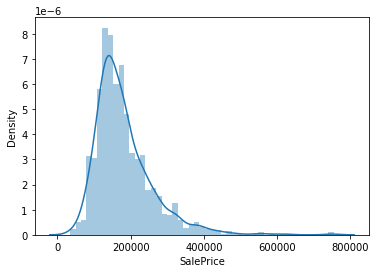

In [8]:
sns.distplot(df_train['SalePrice'])

房价按价格分布——稍微左偏（符合常识）



## 1.8 查看地上面积、地下室总面积与房价的关系

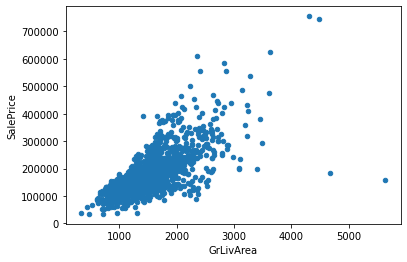

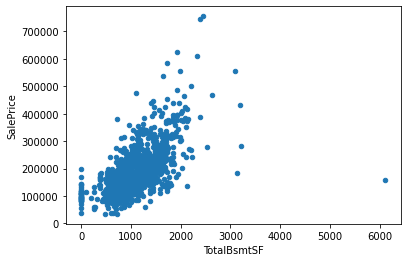

In [9]:
df_train.plot.scatter(x='GrLivArea',y='SalePrice')

#data  = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis =1)
df_train.plot.scatter(x='TotalBsmtSF',y='SalePrice')

有相对明显的线性关系，随着面积增大，价格呈现上升趋势

## 1.9 查看房屋评分的分布情况

In [10]:
df_train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

评分基本呈正态分布

## 1.10 查看房价与建筑年份的关系

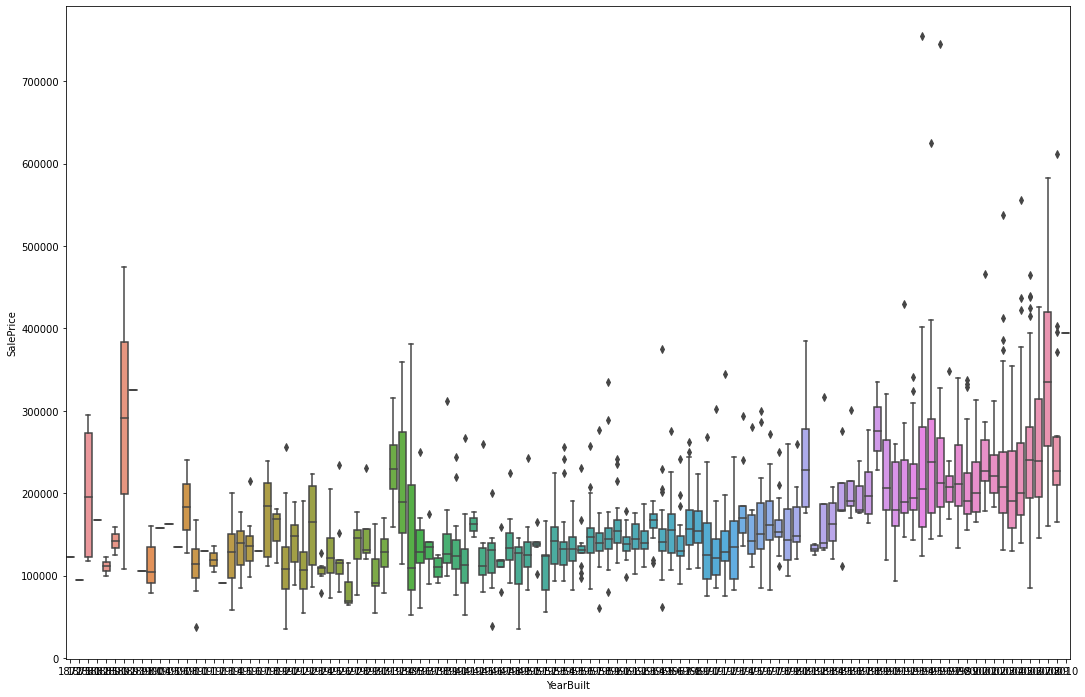

In [11]:
fig,ax =plt.subplots(figsize =(18,12))
sns.boxplot(x='YearBuilt',y='SalePrice',data = df_train)

从建筑年份看，没有很特别的趋势，但房子越新相对价格高。

## 1.11 通过相关矩阵进行特征相关性分析


correlation matrix(heatmap style)

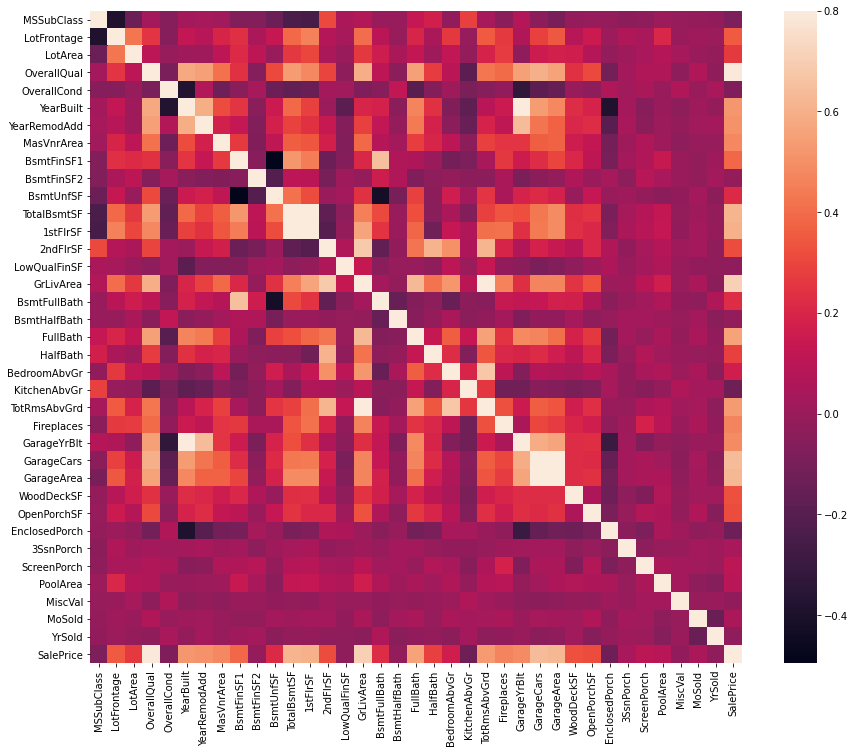

In [12]:
#correlation matrix
f ,ax =plt.subplots(figsize=(15,12))
sns.heatmap(df_train.corr(), vmax=0.8 ,square =True)

与SalePrice相关系数越大则颜色越浅<br> 
颜色相对较浅的：OverallQual(评分),GrLiveArea（地上面积）,TotalBsmtSF（地下面积）, 1stFlrSF（一楼平方英尺）,GarageCars（车库大小）

## 1.12 如何选出最重要的10个特征？
correlation matrix(zoomed heatmap style) 

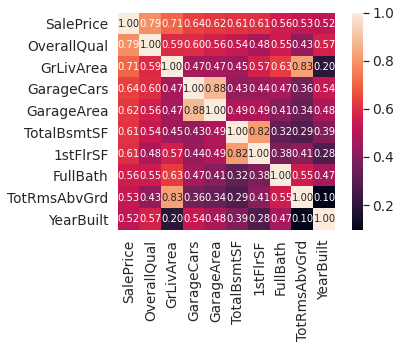

In [13]:
#Saleprice correlation matrix
k =10
cols =df_train.corr().nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale =1.25)
sns.heatmap(cm,cbar =True ,annot =True ,square =True ,fmt='.2f',annot_kws={'size':10},
    yticklabels=cols.values, xticklabels =cols.values)

最相关的10个特征是：<br> OveralQual , GrLivArea, GarageCars , GarageArea ,TotalBsmtSF, 1stFlrSF ,FullBath,
TotRmsAbvGrd ,YearBuilt

# Step 2. 数据预处理

## 2.1 对房价标签做正态处理

直方图 -峰度和偏度

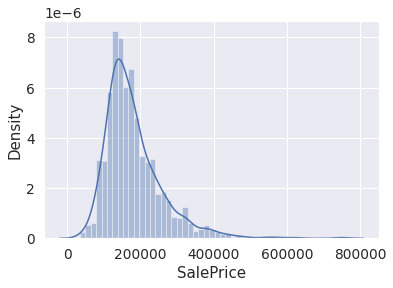

In [14]:
sns.distplot(df_train['SalePrice'])

可以对偏度比较大的数据用log1p函数进行转化，使其更加服从高斯分布<br>
log1p = log(x+1) <br>
pop默认弹出列表中的最后一个元素，弹出之后原来的列表元素删除被弹出元素

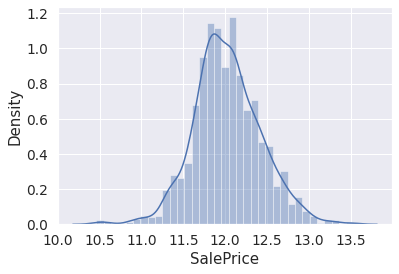

In [15]:
y_train_all = np.log1p(df_train.pop('SalePrice'))
sns.distplot(y_train_all)

## 2.2 合并训练数据和测试数据

将训练集和测试集合并进行特征处理（将测试集接在训练集后面），等特征处理完毕后再拆分出来单独训练和预测


In [16]:
all_df =pd.concat((df_train ,df_test),axis =0)

In [17]:
all_df.shape

(2919, 79)

合起来共2919条数据，特征还是79个

In [18]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 2.3 将类别型数据进行One-hot处理

注意到MSSubClass_20是类别型数据

In [19]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

数字本身大小的含义会在模型中有影响，所以为了避免分类时的数值影响，  
采用pandas自带的get_dummies方法，实现one-hot

In [20]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


MSSSubClass 被我们分成了16个columns ,每一个代表一个Category, 是就是1，不是就是0  
  
 同样，将所有的类别（category）数据，都进行One-hot处理

In [21]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## 2.4 处理缺失值问题

In [22]:
num =all_dummy_df.isnull().sum().sort_values(ascending = False)
percent =(all_dummy_df.isnull().sum()/all_dummy_df.isnull().count()).sort_values(ascending=False)
missing_data =pd.concat([num,percent],axis =1 ,keys =['Total','Percent'])
missing_data.head(12)

,Total,Percent
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
MasVnrArea,23,0.007879
BsmtFullBath,2,0.000685
BsmtHalfBath,2,0.000685
BsmtFinSF1,1,0.000343
BsmtFinSF2,1,0.000343
BsmtUnfSF,1,0.000343
TotalBsmtSF,1,0.000343
GarageArea,1,0.000343


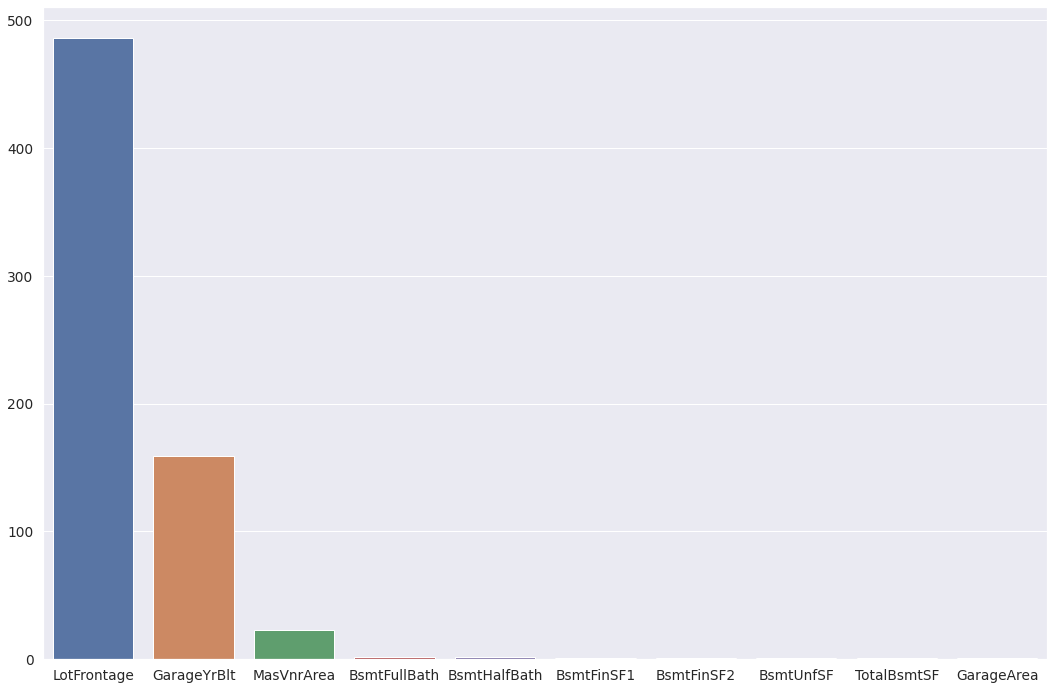

In [23]:
f ,ax = plt.subplots(figsize = (18,12))
sns.barplot(x =missing_data.index[:10],y=num[:10])

缺失值最多的是LotFrontage :Linear feet of street connected to property，意思是与街道的直线距离<br>
GarageYrBlt ,车库修建年份, 等。。。<br>
这里我们采用各特征已有数据的平均值来填充

In [24]:
mean_cols =all_dummy_df.mean()
mean_cols.head(10)

MSSubClass         57.137718
LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
dtype: float64

In [25]:
all_dummy_df =all_dummy_df.fillna(mean_cols)

In [26]:
all_dummy_df.isnull().sum().sum()

0

填充完毕，已经没有缺失值了

## 2.5 数据归一化  
各个特征的数据范围不一样，会影响线性回归的效果  
模型相对喜欢归一化的数据

In [27]:
numeric_cols = all_df.columns[all_df.dtypes !='object']
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

数值化的特征有这么多，都要归一化处理，  这里我们用标准化处理<br>
标准化： （X-X'）/S

In [28]:
numeric_col_mean =all_dummy_df.loc[: ,numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:,numeric_cols].std()
all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[: ,numeric_cols] - numeric_col_mean)/numeric_col_std

# Step 3. 拆分数据
先把数据集分回  训练集和测试集

In [29]:
dummy_train_df = all_dummy_df.loc[df_train.index]
dummy_test_df = all_dummy_df.loc[df_test.index]

In [30]:
dummy_train_df.shape,dummy_test_df.shape

((1460, 288), (1459, 288))

# Step 4. 选择模型
分别采用:
*   线性回归
*   岭回归
*   Lasso回归
*   随机森林<br>

等模型进行训练和预测

# Setp 5. 训练模型并预测

## 5.1 拆分训练集和验证集

共1460条数据，一分二，训练集和验证集各730条数据

In [31]:
#X_train = dummy_train_df.values
X_test = dummy_test_df.values
X_train = dummy_train_df[:729].values
X_validate = dummy_train_df[730:].values
y_train = y_train_all[:729]
y_validate = y_train_all[730:]

## 5.2 线性回归（Linear Regression）

**LinearRegression 线性回归模型**

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_train_score = lr.score(X_train, y_train)
print("lr_train_score = %f" % lr_train_score)
lr_validate_score = lr.score(X_validate, y_validate)
print("lr_validate_score = %f" % lr_validate_score)

lr_train_score = 0.959925
lr_validate_score = -27166405168256937984.000000


**Ridge Regression 岭回归模型**<br>
L2正则化

In [34]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [35]:
alphas  = np.logspace(-3,2,50)    # logspace(a,b,n)生成从10的a次方到10的b次方之间按对数等分的n个元素的行向量
alphas                            # alphas是岭回归模型的超参数

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

In [36]:
ridge = RidgeCV(alphas,cv=5)
ridge.fit(X_train, y_train)
ridge_train_score =ridge.score(X_train,y_train)
print("ridge_train_score = %f" % ridge_train_score)
ridge_validate_score = ridge.score(X_validate,y_validate)
print("ridge_validate_score = %f" %ridge_validate_score)
#ridge.alpha_

ridge_train_score = 0.923679
ridge_validate_score = 0.858951


In [37]:
ridge.coef_       # 查看模型的系数

array([-1.17480740e-02,  1.77603717e-02,  1.11167606e-02,  7.95668573e-02,
        3.68876623e-02,  2.72176951e-02,  3.02137773e-02, -4.47747150e-03,
        1.64830849e-02,  1.01857105e-02,  3.47417284e-03,  2.44129440e-02,
        3.90470633e-02,  2.57304644e-02,  1.97944481e-03,  5.22538481e-02,
        1.99278327e-02,  5.63640298e-04,  1.88770957e-02,  1.58827631e-02,
       -3.73475369e-03, -6.92814414e-03,  3.64522323e-02,  1.89171095e-02,
       -4.29122542e-03,  1.81836114e-02,  2.59579402e-02,  1.32712271e-02,
       -7.18321534e-03,  2.36186003e-03,  3.06740058e-03,  1.68170121e-02,
       -7.30682753e-03, -8.04058691e-04, -2.12681640e-03, -1.13980254e-02,
       -3.94319034e-02,  2.77153428e-02,  8.97407760e-03,  2.53610736e-02,
       -2.26185905e-02, -1.89102930e-03,  1.89102930e-03,  8.14979304e-03,
       -1.23893536e-03, -1.02934400e-02,  1.46439327e-02, -4.70478552e-03,
        3.54292771e-04, -1.09071199e-02,  8.68533800e-03,  3.67839693e-03,
       -1.45661500e-03,  

**Lasso Regression Lasso回归模型**<br>
L1正则化

In [38]:
from  sklearn.linear_model import Lasso
from  sklearn.linear_model import LassoCV

In [39]:
ls = LassoCV(cv=5, random_state=0)
ls.fit(X_train,y_train)
ls_train_score = ls.score(X_train, y_train)
print("ls_train_score = %f" % ls_train_score)
ls_validate_score = ls.score(X_validate, y_validate)
print("ls_validate_score = %f" % ls_validate_score)

ls_train_score = 0.936182
ls_validate_score = 0.846226


In [40]:
ls.coef_       # 查看模型的系数

array([-1.06694706e-02,  2.04926299e-02,  1.12142041e-02,  8.42693672e-02,
        3.52435017e-02,  3.05450967e-02,  3.11198596e-02, -7.72892318e-04,
        1.57876974e-02,  3.03008471e-03, -0.00000000e+00,  3.14858345e-02,
        1.43821395e-02,  0.00000000e+00, -0.00000000e+00,  1.07683947e-01,
        1.92568468e-02,  1.85680444e-03,  1.16424221e-02,  1.07044774e-02,
       -8.59260786e-03, -7.12874850e-03,  2.82749446e-02,  1.50603244e-02,
       -1.50395728e-03,  1.71538757e-02,  2.26602240e-02,  1.15568159e-02,
       -6.22885836e-04,  0.00000000e+00,  1.89109860e-03,  1.51708714e-02,
       -8.03445713e-03, -3.57990723e-04, -1.55108698e-03, -9.98540853e-03,
       -2.02850501e-01,  0.00000000e+00,  0.00000000e+00,  1.50092328e-02,
       -4.16924039e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -6.03293842e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

## 5.3 随机森林（Random Forest）

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [42]:
N_estimators = [50,100,150,200,260,350,400]
test_scores = []
for N in N_estimators:
    clf =RandomForestRegressor(n_estimators=N, max_features = 0.3)
    test_score = np.sqrt(-cross_val_score(clf , X_train , y_train,cv =5 ,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'N_estimator vs CV Error')

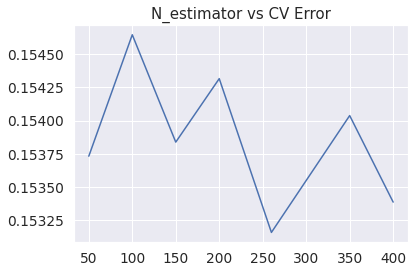

In [43]:
plt.plot(N_estimators , test_scores)
plt.title("N_estimator vs CV Error")

In [44]:
rf = RandomForestRegressor(n_estimators=350 ,max_features = 0.3)
rf.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=350, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
rf_train_score =rf.score(X_train, y_train)
print("rf_train_score = %f" % rf_train_score)
rf_validate_score = rf.score(X_validate, y_validate)
print("rf_validate_score = %f" % rf_validate_score)

rf_train_score = 0.980844
rf_validate_score = 0.871801


# Step 6. 集成学习 Ensemble

In [46]:
print("ridge_train_score = %f" % ridge_train_score)
print("ridge_validate_score = %f" % ridge_validate_score)

print("rf_train_score = %f" % rf_train_score)
print("rf_validate_score = %f" % rf_validate_score)

ridge_train_score = 0.923679
ridge_validate_score = 0.858951
rf_train_score = 0.980844
rf_validate_score = 0.871801


In [47]:
ridge_predict = ridge.predict(X_test)
rf_predict = rf.predict(X_test)

expm1是log1p的逆运算，我们之前在2.1 对房价标签应用了log1p运算，现在要把房价标签用expm1还原

In [48]:
y_ridge = np.expm1(ridge_predict)
y_rf = np.expm1(rf_predict)

y_final = (y_ridge+y_rf)/2

# Step 7. 提交结果

In [49]:
submission_df = pd.DataFrame(data ={'Id':df_test.index,'SalePrice':y_final})

In [50]:
submission_df.head(10)

,Id,SalePrice
0,1461,121468.801032
1,1462,148288.100018
2,1463,176585.819318
3,1464,190026.500186
4,1465,193551.064501
5,1466,172310.362821
6,1467,174452.735869
7,1468,165986.693828
8,1469,181923.246048
9,1470,122803.695127


In [51]:
submission_df.to_csv('ensemble_ridge_randomForest.csv',index=False)

# Step 8. Boosting (Optional)
Boosting 比Bagging 理论上更高级点，为啥叫“提升”，就是弄了很多分类器，按照顺序的一个分类器  
对上一个分类器做“提升”，让上一个分类器做得不好的地方给它重视（更多的权重）起来，  
下次分类器就知道那里跟该优化了。

In [54]:
from sklearn.ensemble import AdaBoostRegressor

Text(0.5, 1.0, 'N_estimators_params vs CV Error')

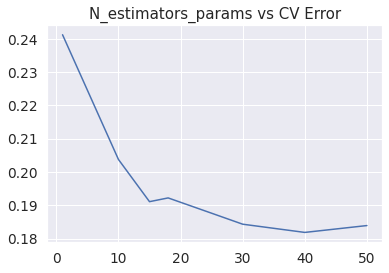

In [64]:
N_estimators_params = [1, 10, 15, 18, 25, 30, 40, 50]
test_scores = []
for N in N_estimators_params:
    clf = AdaBoostRegressor(n_estimators=N) 
    test_score = np.sqrt(-cross_val_score(clf, X_train ,y_train,cv =10,scoring ='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(N_estimators_params ,test_scores)
plt.title('N_estimators_params vs CV Error')

In [67]:
adabr = AdaBoostRegressor(random_state=0, n_estimators=40)
adabr.fit(X_train , y_train)
adabr_train_score =adabr.score(X_train, y_train)
print("adabr_train_score = %f" % adabr_train_score)
adabr_validate_score = adabr.score(X_validate, y_validate)
print("adabr_validate_score = %f" % adabr_validate_score)

adabr_train_score = 0.869252
adabr_validate_score = 0.798797


# Step 9. XGBoost (Optional)
kaggle界的神器：XGBoost

In [57]:
from xgboost import XGBRegressor

Text(0.5, 1.0, 'max_dpth vs CV error')

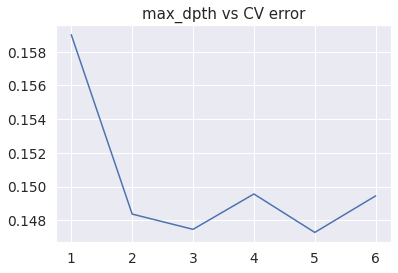

In [58]:
params =[1,2,3,4,5,6]
test_scores =[]
for param in params:
    clf =XGBRegressor(max_depth=param, objective ='reg:squarederror')
    test_score = np.sqrt(-cross_val_score(clf ,X_train ,y_train ,cv =10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title('max_dpth vs CV error')

In [59]:
xgbr = XGBRegressor(max_depth=5, objective ='reg:squarederror')
xgbr.fit(X_train ,y_train)

xgbr_train_score = xgbr.score(X_train,y_train)
print("xgbr_train_score = %f" % xgbr_train_score)

xgbr_validate_score = xgbr.score(X_validate, y_validate)
print("xgbr_validate_score = %f" % xgbr_validate_score)

# xgboost_predict =clf.predict(X_test)
# y_xgboost = np.expm1(xgboost_predict)


xgbr_train_score = 0.988834
xgbr_validate_score = 0.871666
